In [356]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# City ethnic categories

Goal: in a dimension table, to categorically represent a city's ethnical demographics

Method:
- start by visually recognicing city categories in PCA transform of racial ratios
- computing city categories by clustering

## City population ethnical ratios

In [357]:
population = pd.read_csv('../../us-cities-demographics.csv', sep=';')

In [358]:
population.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


### Ratial ratio per city

In [359]:
def race_cols(df):
    return df[['City', 'State', 'Race', 'Count', 'Total Population']]

In [360]:
def race_ratio(df):
    return df.assign(race_ratio=df['Count'] / df['Total Population'])

In [361]:
def pivot_race(df):
    return df.pivot(index=['City', 'State'], columns='Race', values='race_ratio')

In [362]:
def rename(df):
    return df.rename(columns={
        'American Indian and Alaska Native': 'native',
        'Asian': 'asian',
        'Black or African-American': 'black',
        'Hispanic or Latino': 'latino',
        'White': 'white'
    })

In [363]:
def fill_null(df):
    return df.fillna(0)

In [364]:
ratios = (
    population
    .pipe(race_cols)
    .pipe(race_ratio)
    .pipe(pivot_race)
    .pipe(rename)
)

In [365]:
ratios

,Race,native,asian,black,latino,white
City,State,,,,,
Abilene,Texas,0.014403,0.023269,0.114788,0.263926,0.758580
Akron,Ohio,0.009339,0.045724,0.336877,0.018648,0.653961
Alafaya,Florida,NaN,0.121223,0.077137,0.409282,0.746693
Alameda,California,0.016905,0.355967,0.093673,0.105134,0.562648
Albany,Georgia,0.006258,0.009141,0.751522,0.025074,0.241320
...,...,...,...,...,...,...
Yonkers,New York,0.005529,0.069516,0.192578,0.365994,0.643861
Yorba Linda,California,0.003104,0.259188,0.019510,0.155946,0.735368
Youngs,Ohio,0.013543,0.003823,0.491031,0.117073,0.511245


In [366]:
most = ['Rapid City', 'Urban Honolulu', 'East Orange', 'Bayamón', 'The Villages']

In [367]:
def order(df, race):
    return df.sort_values(race, ascending=False).head(10)

In [368]:
(
    ratios
    .pipe(order, 'white')
)

,Race,native,asian,black,latino,white
City,State,,,,,
The Villages,Florida,NaN,NaN,0.004560,0.014685,0.994779
Laredo,Texas,0.004899,0.007674,0.003253,0.950745,0.963458
Pharr,Texas,NaN,NaN,0.002665,0.953747,0.962880
Bend,Oregon,0.020892,0.031327,0.005344,0.093924,0.961755
Spokane Valley,Washington,0.026057,0.014077,0.012560,0.053842,0.960140
Parma,Ohio,0.010958,0.012184,0.036626,0.067060,0.954205
Loveland,Colorado,0.013686,0.020602,0.012635,0.180441,0.951455
Brownsville,Texas,0.006335,0.008641,0.006738,0.924699,0.949872
Duluth,Minnesota,0.021991,0.019982,0.045178,0.023001,0.948842


## Ethnical ratios PCA visualization and analysis

In [369]:
pca = PCA(n_components=2)

In [371]:
pca.fit(ratios.pipe(fill_null))

PCA(n_components=2)

In [373]:
ratios_pca = pd.DataFrame(
    pca.transform(ratios.pipe(fill_null)), 
    index=ratios.index
)

In [374]:
ratios_pca.head()

,,0,1
City,State,,
Abilene,Texas,-0.014845,-0.091189
Akron,Ohio,-0.222459,0.185685
Alafaya,Florida,0.128416,-0.136911
Alameda,California,-0.080202,0.085738
Albany,Georgia,-0.101534,0.750659


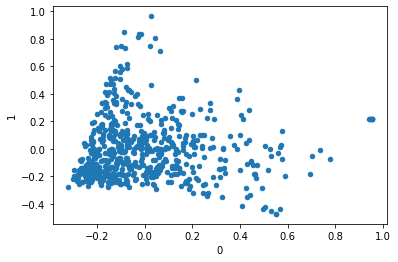

In [375]:
ratios_pca.plot.scatter(x=0, y=1);

Lets compare the extremes.
- low  0 low 1: white
- high 0 low1:  white latino
- high 0 mid1:  latino
- low  0 high1: black

In [88]:
extremes = ['The Villages', 'Pharr', 'Bayamón', 'East Orange']

Bottom left

In [65]:
ratios_pca[ratios_pca[0] == ratios_pca[0].min()]

,,0,1
City,State,,
The Villages,Florida,-0.323062,-0.277184


In [70]:
ratios.loc[['The Villages']]

,Race,native,asian,black,latino,white
City,State,,,,,
The Villages,Florida,0.0,0.0,0.00456,0.014685,0.994779


bottom (min 1)

In [72]:
ratios_pca[ratios_pca[1] == ratios_pca[1].min()]

,,0,1
City,State,,
Pharr,Texas,0.55308,-0.472121


In [73]:
ratios.loc['Pharr']

Race,native,asian,black,latino,white
State,,,,,
Texas,0.0,0.0,0.002665,0.953747,0.96288


Far right (max 0)

In [74]:
ratios_pca[ratios_pca[0] == ratios_pca[0].max()]

,,0,1
City,State,,
Bayamón,Puerto Rico,0.955062,0.217313


In [75]:
ratios.loc['Bayamón']

Race,native,asian,black,latino,white
State,,,,,
Puerto Rico,0.0,0.0,0.0,0.993516,0.0


top (max 1)

In [77]:
ratios_pca[ratios_pca[1] == ratios_pca[1].max()]

,,0,1
City,State,,
East Orange,New Jersey,0.024863,0.963682


In [78]:
ratios.loc['East Orange']

Race,native,asian,black,latino,white
State,,,,,
New Jersey,0.008236,0.010098,0.890659,0.098027,0.048721


## Clustering by race ratios

In [376]:
def ratios_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
    return df.assign(cluster=pd.DataFrame(kmeans.predict(df), index=df.index))

In [377]:
def cluster_heads(df, n_clusters):
    for i in range(0, n_clusters):
        frame = df[df['cluster'] == i].head()
        display(frame)

In [378]:
def cluster_extremes(df):
    for x in extremes:
        print(x)
        display(df.loc[x])
    return df

In [379]:
def cluster_most(df):
    for x in most:
        print(x)
        display(df.loc[x]);
    return df

In [393]:
def foreach_cluster(df, fn):
    for i in range(n_clusters):
        print(f"[*] cluster {i}")
        cluster = df.pipe(filter_cluster, i).pipe(drop_cluster_col)
        cluster.pipe(fn)
    #return df

In [381]:
def filter_cluster(df, cluster):
    return df[df['cluster'] == cluster]

In [382]:
def drop_cluster_col(df):
    return df.drop(columns=['cluster'])

In [383]:
def cluster_dist(df):
    data = clusters['cluster'].value_counts().to_frame().reset_index()
    x = data.iloc[:,0]
    y = data.iloc[:,1]
    plt.figure()
    plt.bar(x, y)
    plt.show()
    return df

In [464]:
def cluster_race_dist(df):
    colors = {
        'native': 'red', 
        'asian': 'yellow', 
        'black': 'black', 
        'latino': 'brown',
        'white': 'grey'
    }
    color = ['red', 'yellow', 'black', 'brown', 'lightgrey']
    label = ['native', 'asian', 'black', 'latino', 'white']
    plt.figure()
    plt.hist(
        df, 
        bins=10, # relatively few bins are much easier to visually interpret
        color=color,
        label=label
    )
    plt.show()

In [385]:
n_clusters = 7

In [390]:
clusters = (
    ratios
    .pipe(fill_null)
    .pipe(ratios_kmeans, n_clusters)
)

In [391]:
clusters

,Race,native,asian,black,latino,white,cluster
City,State,,,,,,
Abilene,Texas,0.014403,0.023269,0.114788,0.263926,0.758580,2
Akron,Ohio,0.009339,0.045724,0.336877,0.018648,0.653961,0
Alafaya,Florida,0.000000,0.121223,0.077137,0.409282,0.746693,2
Alameda,California,0.016905,0.355967,0.093673,0.105134,0.562648,3
Albany,Georgia,0.006258,0.009141,0.751522,0.025074,0.241320,4
...,...,...,...,...,...,...,...
Yonkers,New York,0.005529,0.069516,0.192578,0.365994,0.643861,2
Yorba Linda,California,0.003104,0.259188,0.019510,0.155946,0.735368,1
Youngs,Ohio,0.013543,0.003823,0.491031,0.117073,0.511245,4


### Visual interpretation of ethnic ratio distribution by cluster

The following histograms show how different ethnic group ratios are distributed over the cities in each cluster:
- I tried different numbers of clusters
- 7 seemed to me like a reasonable value after comparing the histograms for each cluster: enough to distinguish clearly different ethnical distributions without a category explosion
- With 7 there are no categories with native or asian majority, given how infrequent they are
- There is at least one category where each of white, black and latino is the majority
- The is just one category where one ethinicity is clearly dominating, white, because this is so frequent
- It should be noted that the ratios don't always add to 1, as would be expected, most likely because in certain cities many latinos are likely to also declare as white; for this reason the category "white latino" seemed reasonable

[*] cluster 0


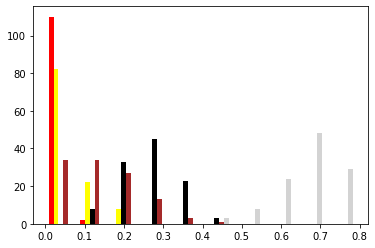

[*] cluster 1


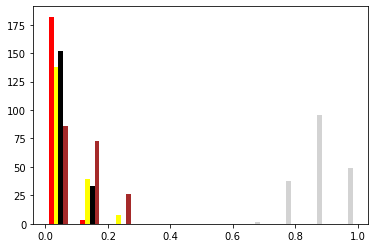

[*] cluster 2


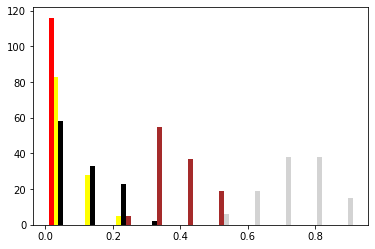

[*] cluster 3


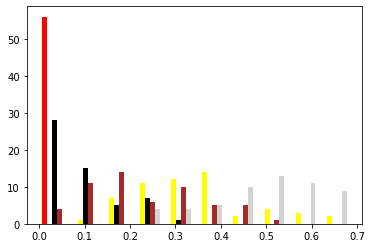

[*] cluster 4


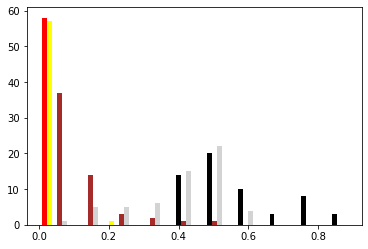

[*] cluster 5


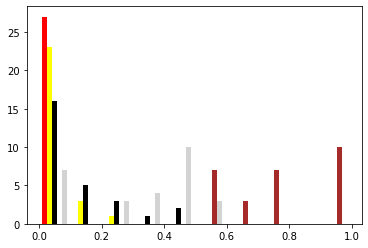

[*] cluster 6


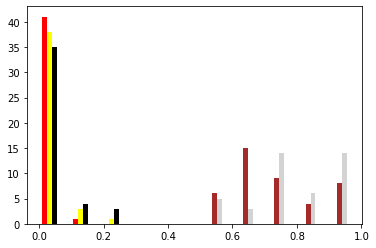

In [394]:
(
    clusters
    .pipe(foreach_cluster, cluster_race_dist)
)

## City ethnic categories

In [433]:
ethnicity = pd.DataFrame([
                                [0, 'white, black minority'],
                                [1, 'white'],    
                                [2, 'white, latino minority'],    
                                [3, 'white, asian minority'],
                                [4, 'black, white minority'],    
                                [5, 'latino, white minority'],    
                                [6, 'white latino']
                ], columns=['ethnicity', 'ethnicity_name']
)

I finally settled on the following city ethnical categorization:

In [434]:
ethnicity

,ethnicity,ethnicity_name
0,0,"white, black minority"
1,1,white
2,2,"white, latino minority"
3,3,"white, asian minority"
4,4,"black, white minority"
5,5,"latino, white minority"
6,6,white latino


In [442]:
def reset_clusters_index(df):
    return df.reset_index()

In [443]:
def reorganize_cols(df):
    return (
        df
        .drop(columns=['cluster'])
        .rename(columns={'City': 'city', 'State': 'state'})
        [['city', 'state', 'ethnicity', 'ethnicity_name', 'white', 'black', 'latino', 'asian', 'native']]
    )

In [444]:
def merge_clusters_ethnicity(df):
    return df.merge(
        ethnicity, 
        left_on='cluster',
        right_on='ethnicity',
        how='inner'
    )

In [465]:
city_ethnicity = (
    clusters
    .pipe(reset_clusters_index)
    .pipe(merge_clusters_ethnicity)
    .pipe(reorganize_cols)
)

The following table is useful and worth materializing because:
- it classifies every city by its ethnical category
- it contains useful derived columns
- it is easily joinable with demographics on city and state

In [467]:
city_ethnicity

,city,state,ethnicity,ethnicity_name,white,black,latino,asian,native
0,Abilene,Texas,2,"white, latino minority",0.758580,0.114788,0.263926,0.023269,0.014403
1,Alafaya,Florida,2,"white, latino minority",0.746693,0.077137,0.409282,0.121223,0.000000
2,Albuquerque,New Mexico,2,"white, latino minority",0.736584,0.047885,0.486208,0.044963,0.057666
3,Allen,Pennsylvania,2,"white, latino minority",0.617160,0.185547,0.492284,0.022212,0.008951
4,Amarillo,Texas,2,"white, latino minority",0.872593,0.070373,0.327532,0.042890,0.021337
...,...,...,...,...,...,...,...,...,...
591,Paterson,New Jersey,5,"latino, white minority",0.371454,0.310361,0.579025,0.065330,0.007330
592,Perris,California,5,"latino, white minority",0.318601,0.125309,0.725703,0.044571,0.000000
593,Ponce,Puerto Rico,5,"latino, white minority",0.000000,0.000000,0.992779,0.000000,0.000000
594,San Juan,Puerto Rico,5,"latino, white minority",0.000000,0.000000,0.980487,0.007165,0.011778


In [453]:
city_ethnicity.to_csv('../curated/city_ethnicity.csv')

The ethinical categories are broadly correct in the following small sample:

In [460]:
city_ethnicity.sample(20)

,city,state,ethnicity,ethnicity_name,white,black,latino,asian,native
175,Lafayette,Louisiana,0,"white, black minority",0.668035,0.312249,0.051355,0.021745,0.009267
181,Lynchburg,Virginia,0,"white, black minority",0.673169,0.291573,0.033692,0.036461,0.012830
134,Charlotte,North Carolina,0,"white, black minority",0.540181,0.364600,0.137502,0.066978,0.010574
136,Chesapeake,Virginia,0,"white, black minority",0.638893,0.313683,0.055044,0.048227,0.008865
167,Jacksonville,Florida,0,"white, black minority",0.626224,0.325670,0.092236,0.058633,0.009420
334,Southfield,Michigan,4,"black, white minority",0.250024,0.740670,0.007830,0.018380,0.013433
375,Cedar Rapids,Iowa,1,white,0.896062,0.091415,0.040857,0.041455,0.009532
529,Brownsville,Texas,6,white latino,0.949872,0.006738,0.924699,0.008641,0.006335
559,San Antonio,Texas,6,white latino,0.843701,0.081331,0.637904,0.036694,0.014119
58,Midland,Texas,2,"white, latino minority",0.872193,0.078067,0.441346,0.024663,0.014457
